# Importing Package

In [ ]:
# Importing all the required package 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize

plt.style.use("ggplot")

# Data Retrieval

Historical stock price data from January 1, 2020 to December 31, 2024 was pulled from Yahoo Finance using the yfinance library. Ten selected tickers were used to create the portfolio, and only the ‘Close’ prices were extracted for consistency in backtesting and performance analysis. These values were then stored in a DataFrame.

To ensure data quality, checks were performed to identify any missing or duplicate values using .isnull() and .duplicated(). Both checks returned 0, indicating that the dataset is already clean. Finally, the clean dataset was saved as a CSV file for easy reuse in later stages of the analysis.

In [2]:
# Pull the porfolio from Yahoo!Finance
tickers = ['ADBE', 'AMZN', 'JPM', 'GOOGL', 'CVX', 'MSFT', 'PG', 'JNJ', 'V', 'SCHW']

# Download full dataset
data = yf.download(tickers, start='2020-01-01', end='2024-12-31')

# Extract only the 'Close' prices for all 10 stocks
close_prices_data = data['Close']

#check if there is any missing or duplicates data
print("Duplicates:", close_prices_data.duplicated().sum())
print("Missing:", close_prices_data.isnull().sum().sum())

#Given that there is no missing and duplicates data as the result shown below, we can proceed to the next step

# Save the data to CSV
close_prices_data.to_csv('stock_data.csv')

/tmp/ipykernel_2020/2786620056.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  10 of 10 completed


Duplicates: 0
Missing: 0


# Data Exploration

The dataset containing daily closing prices for ten stocks from 2020–2024 is loaded and inspected using the head and tail of the DataFrame. A line plot is then created to visualise the price trends of all ten stocks over time. This helps quickly identify performance patterns, volatility, and stock-specific movements across the five-year period.

,ADBE,AMZN,CVX,GOOGL,JNJ,JPM,MSFT,PG,SCHW,V
Date,,,,,,,,,,
2020-01-02,334.429993,94.900497,95.001549,68.026024,124.983727,120.733543,153.042343,107.748245,44.621307,183.872055
2020-01-03,331.809998,93.748497,94.672958,67.670151,123.536674,119.140297,151.136658,107.023567,43.492599,182.409698
2020-01-06,333.709991,95.143997,94.352196,69.473846,123.382553,119.045593,151.527298,107.172012,43.797909,182.015274
2020-01-07,333.390015,95.343002,93.147369,69.339645,124.136009,117.021721,150.145721,106.508469,44.056961,181.534210
2020-01-08,337.869995,94.598503,92.083359,69.833183,124.118858,117.934616,152.537277,106.962456,44.325256,184.641678


,ADBE,AMZN,CVX,GOOGL,JNJ,JPM,MSFT,PG,SCHW,V
Date,,,,,,,,,,
2024-12-23,446.739990,225.059998,139.700027,194.171036,142.891403,235.713242,433.583038,166.056030,74.224411,316.162048
2024-12-24,447.940002,229.050003,140.550125,195.647552,143.461914,239.589218,437.647369,166.875900,74.353569,319.580597
2024-12-26,450.160004,227.050003,140.686935,195.138748,143.196320,240.409912,436.432068,168.080994,74.562202,319.839752
2024-12-27,446.480011,223.750000,140.706467,192.305435,142.675018,238.462036,428.881104,167.458694,74.254219,317.597229
2024-12-30,445.799988,221.300003,139.797745,190.789047,140.992996,236.632812,423.202911,165.048492,73.449478,314.258423


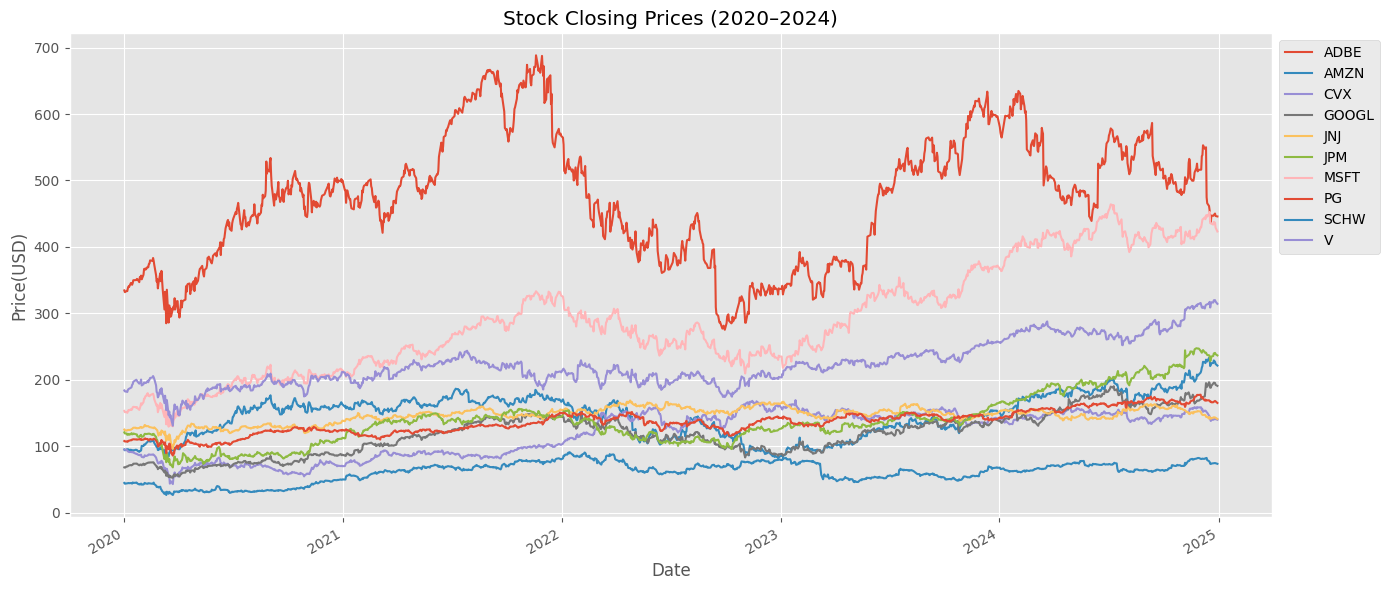

In [3]:
df = pd.read_csv('stock_data.csv', index_col=0, parse_dates=True)

# Head and tail of closing prices
display(df.head())
display(df.tail())

# Plot all stocks
df.plot(figsize=(14,6), title="Stock Closing Prices (2020–2024)")
plt.ylabel("Price(USD)")
plt.xlabel("Date")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.tight_layout()
plt.show()


# BOLLINGER BANDS STRATEGY

/tmp/ipykernel_2020/3675153964.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if price[i] < lower[i]:
/tmp/ipykernel_2020/3675153964.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif price[i] > upper[i]:
/tmp/ipykernel_2020/3675153964.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if price[i] <= sma[i]:
/tmp/ipykernel_2020/3675153964.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecate

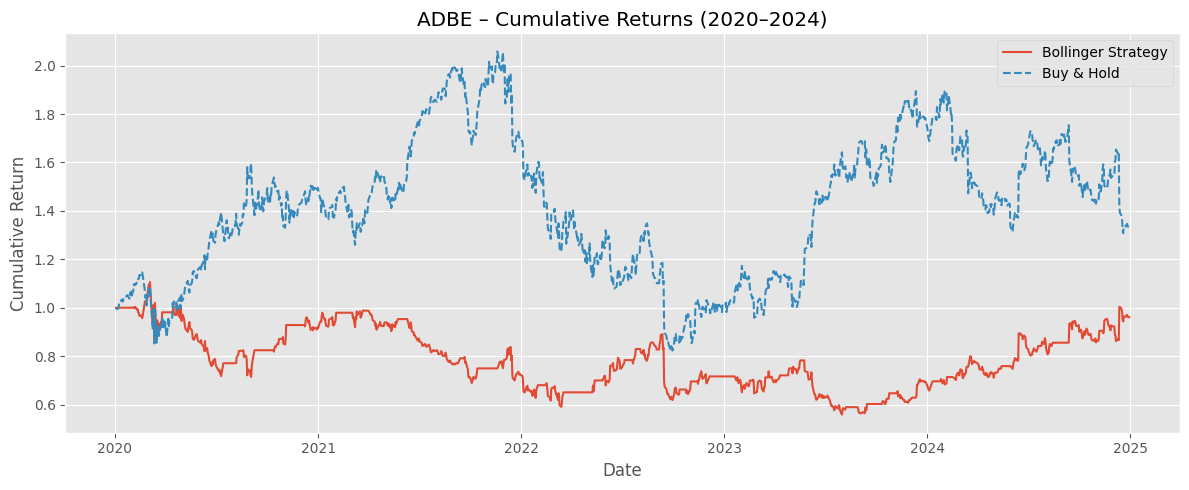

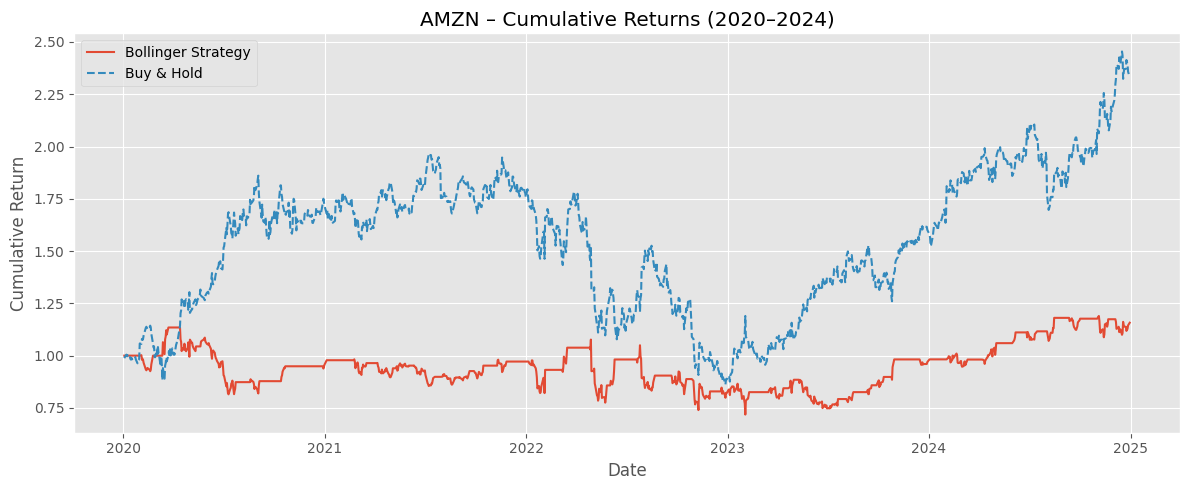

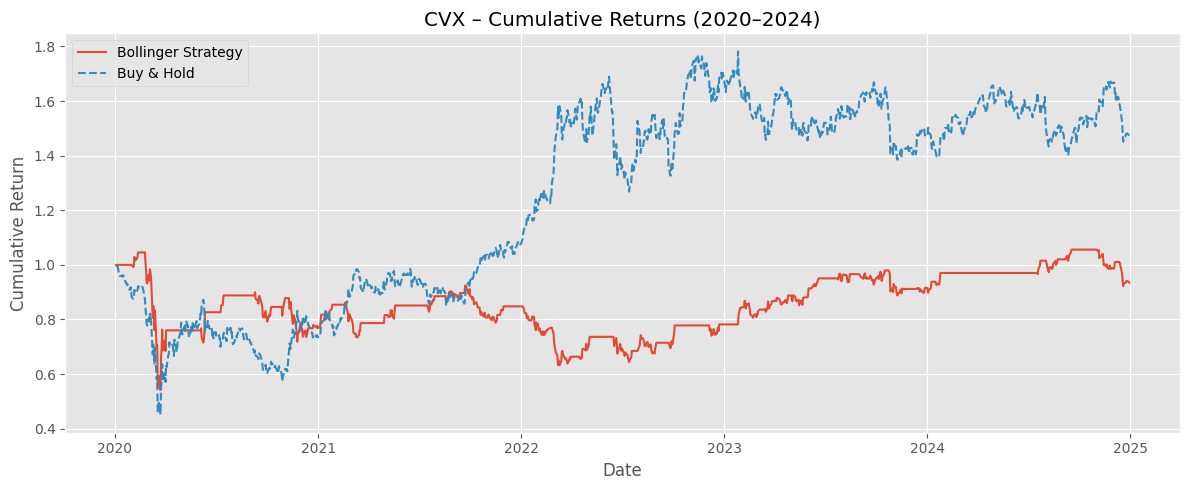

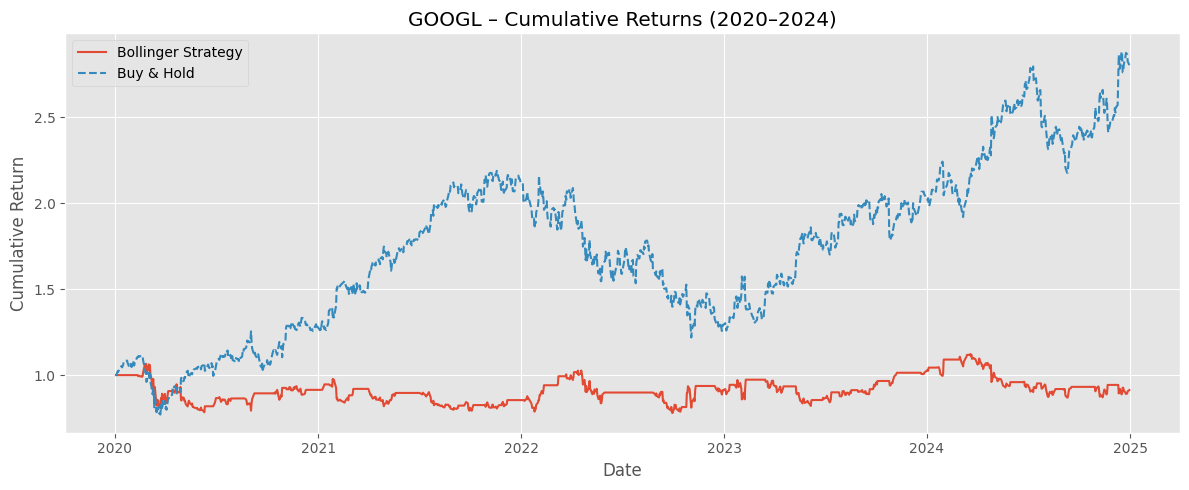

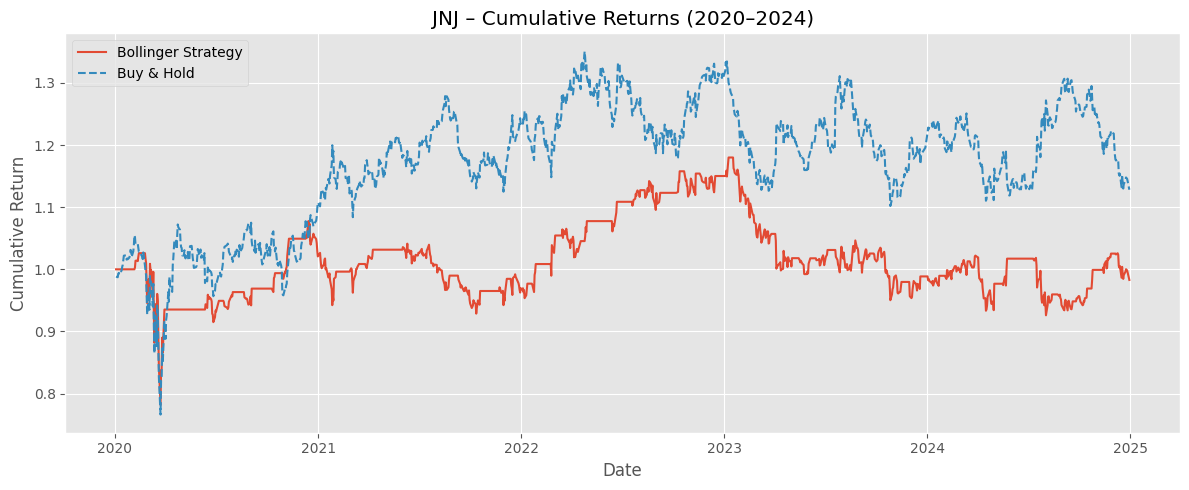

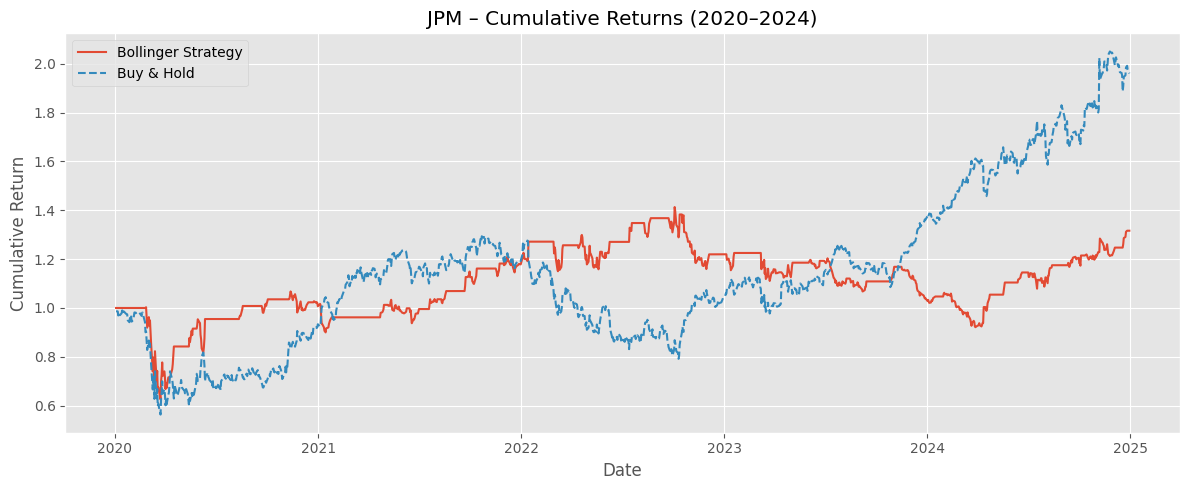

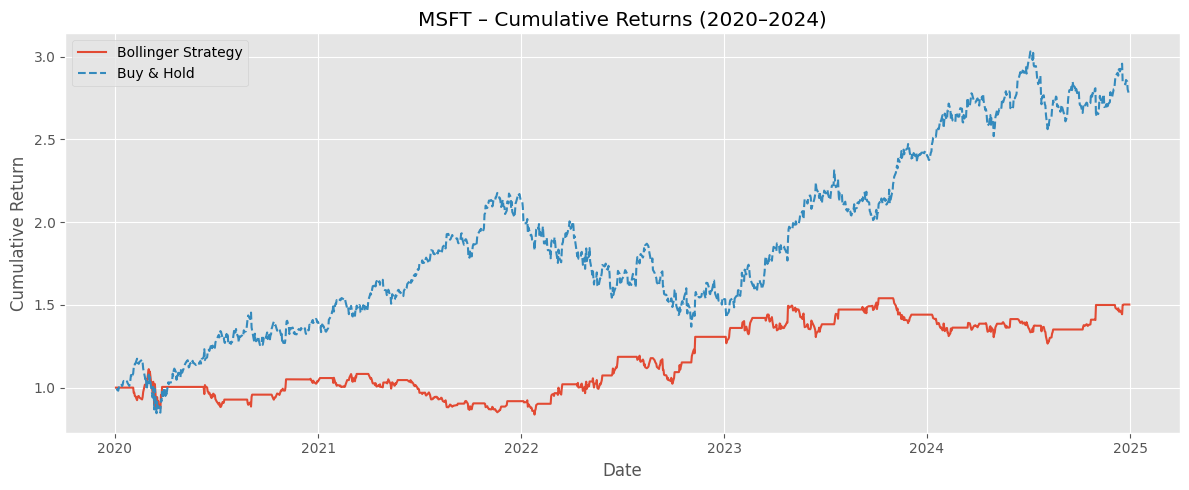

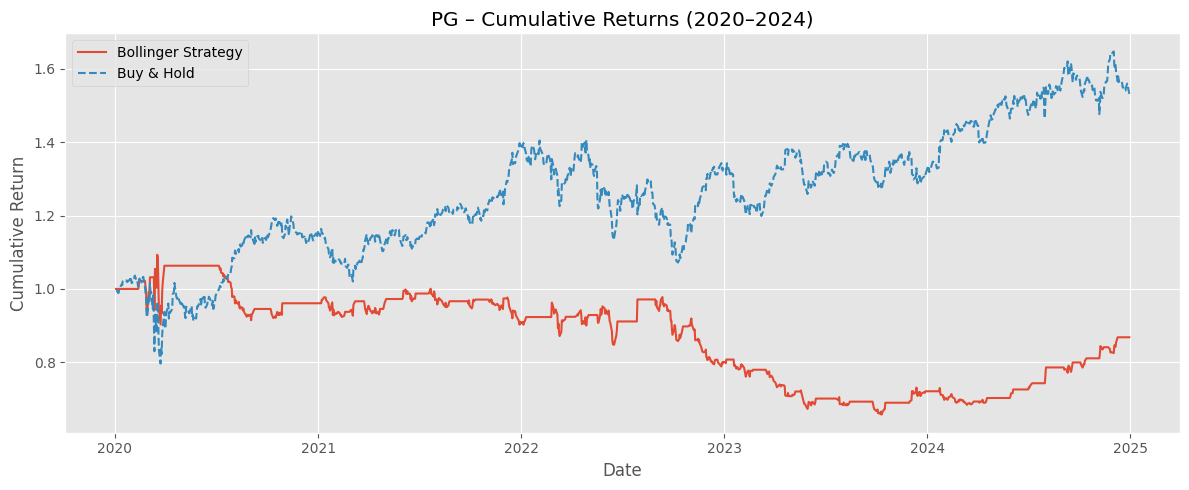

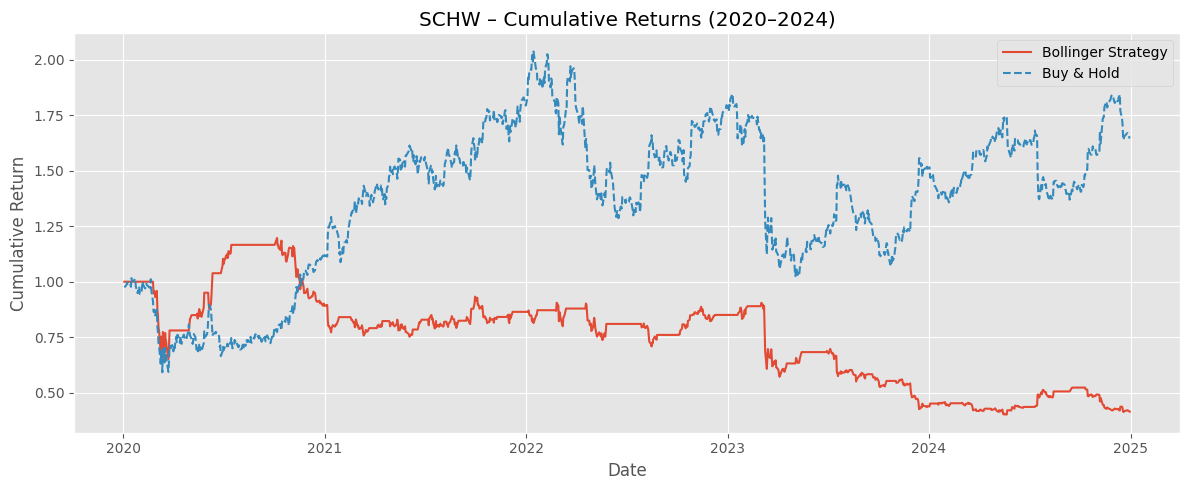

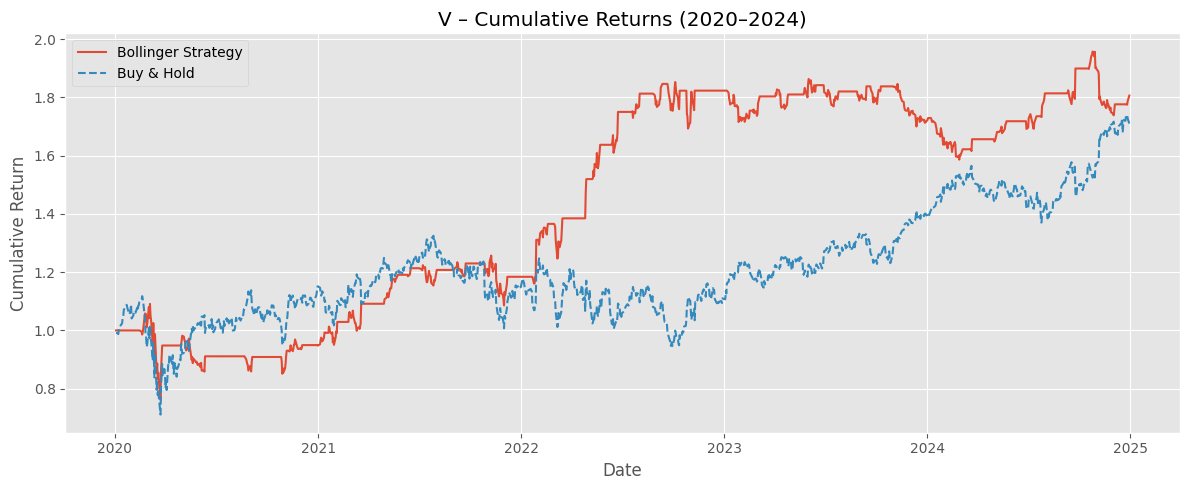

Bollinger Strategy vs Buy&Hold


/tmp/ipykernel_2020/3675153964.py:73: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_table = summary_table.applymap(lambda x: f"{x*100:.2f}%")


,Bollinger Strategy Return,Buy & Hold Return
ADBE,-3.93%,33.30%
AMZN,15.74%,133.19%
CVX,-6.54%,47.15%
GOOGL,-8.71%,180.46%
JNJ,-1.71%,12.81%
JPM,31.63%,96.00%
MSFT,50.24%,176.53%
PG,-13.18%,53.18%
SCHW,-58.60%,64.61%
V,80.60%,70.91%


In [ ]:
# Bollinger Bands backtest function
def bollinger_backtest(price, window=20, num_std=2):
    # set up Bollinger Bands
    sma = price.rolling(window).mean()
    std = price.rolling(window).std()
    upper = sma + num_std * std
    lower = sma - num_std * std

    # Position vector: 1 = long, -1 = short, 0 = flat
    position = np.zeros(len(price))  
    in_position = 0

    for i in range(window, len(price)):

        # generate entry signals
        if in_position == 0:
            if price[i] < lower[i]: # Buy Signal
                position[i] = 1
                in_position = 1
            elif price[i] > upper[i]: # Sell Signal
                position[i] = -1
                in_position = -1

        # generate exit signals
        elif in_position == 1: # currently long
            if price[i] >= sma[i]: # exit long
                in_position = 0
            else:              # stay long
                position[i] = 1

        elif in_position == -1: # currently short
            if price[i] <= sma[i]: # Exit short
                in_position = 0
            else:               # stay short
                position[i] = -1

    return pd.Series(position, index=price.index)

# Prepare returns
strategy_returns = pd.DataFrame()
buy_hold_returns = np.log(df / df.shift(1))

# Apply strategy for each stock
for ticker in df.columns:
    price = df[ticker]
    signals = bollinger_backtest(price)
    daily_ret = buy_hold_returns[ticker]
    strat_ret = signals.shift(1) * daily_ret  # avoid look-ahead bias
    strategy_returns[ticker] = strat_ret

# Cumulative returns
cumulative_strategy = strategy_returns.cumsum().apply(np.exp)
cumulative_buyhold = buy_hold_returns.cumsum().apply(np.exp)

# Plot strategy vs buy & hold per stock
for ticker in df.columns:
    plt.figure(figsize=(12, 5))
    plt.plot(cumulative_strategy[ticker], label='Bollinger Strategy')
    plt.plot(cumulative_buyhold[ticker], label='Buy & Hold', linestyle='--')
    plt.title(f'{ticker} – Cumulative Returns (2020–2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Final cumulative return at the end of the period (last row)
final_returns_strategy = cumulative_strategy.iloc[-1]
final_returns_buyhold = cumulative_buyhold.iloc[-1]

# Create a table comparing the Bollinger Strategy Return and the Buy & Hold Return
summary_table = pd.DataFrame({
    'Bollinger Strategy Return': final_returns_strategy - 1,
    'Buy & Hold Return': final_returns_buyhold - 1
})

# Format as percentages
summary_table = summary_table.applymap(lambda x: f"{x*100:.2f}%")

# Display the table
print("Bollinger Strategy vs Buy&Hold")
display(summary_table)

# Portfolio Management

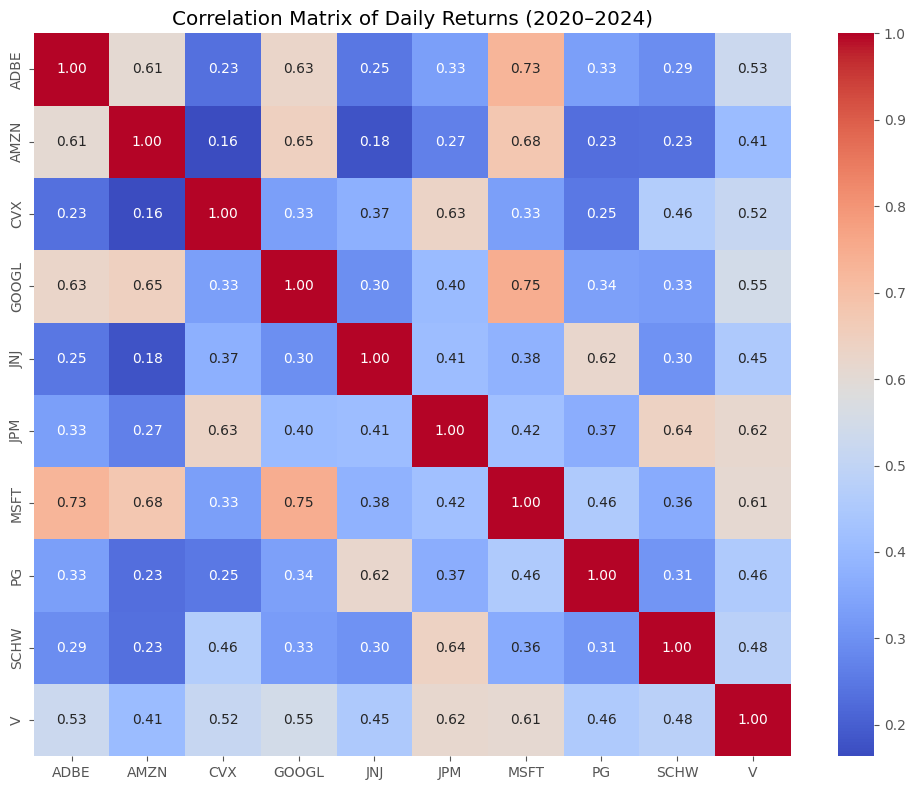

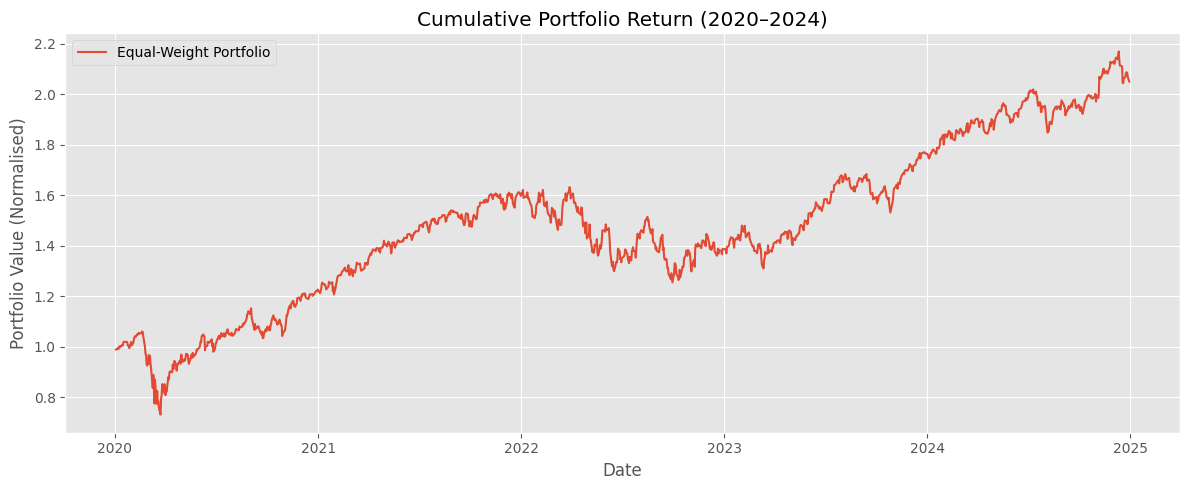

Daily standard deviation of portfolio returns (risk): 0.0138


In [5]:
# calculate simple daily returns
daily_returns = df.pct_change().dropna()

# Visualise correlation matrix of simple daily returns
plt.figure(figsize=(10, 8))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Returns (2020–2024)')
plt.tight_layout()
plt.show()

# Create equal-weight portfolio
n_assets = len(df.columns)
equal_weights = np.array([1/n_assets] * n_assets)

# Calculate portfolio daily returns
portfolio_returns = daily_returns.dot(equal_weights)

# Calculate cumulative returns
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative portfolio returns
plt.figure(figsize=(12, 5))
plt.plot(cumulative_portfolio_returns, label='Equal-Weight Portfolio')
plt.title('Cumulative Portfolio Return (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Normalised)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Risk measurement: standard deviation of daily portfolio returns
portfolio_risk = portfolio_returns.std()

print(f"Daily standard deviation of portfolio returns (risk): {portfolio_risk:.4f}")


# Portfolio Optimisation

## Sharpe Ratio Optimisation

In [6]:
# Objective function: negative Sharpe Ratio
def neg_sharpe_ratio(weights, returns):
    portfolio_return = np.sum(weights * returns.mean())
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    return -portfolio_return / portfolio_vol

# Constraints: weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
# Bounds: weights between 0 and 1
bounds = tuple((0, 1) for _ in range(len(df.columns)))
# Initial guess: equal weights
initial_guess = np.array([1/len(df.columns)] * len(df.columns))

# Run optimisation
sharpe_opt = minimize(neg_sharpe_ratio, initial_guess,
                      args=(daily_returns,),
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)

# Get optimised weights
sharpe_weights = sharpe_opt.x
sharpe_portfolio_returns = daily_returns.dot(sharpe_weights)
sharpe_cumulative_returns = (1 + sharpe_portfolio_returns).cumprod()


## AI-Generated Strategy

The main objective for this AI-generated strategy is to choose weights that minimise portfolio volatility, measured as the standard deviation of daily returns. The rationale is that investors with low risk-tolerance are willing to surrender some upside in exchange for a smoother equity curve.

In [ ]:
# Calculates portfolio volatility (risk) given asset weights and return covariance
def portfolio_volatility(weights, returns):
    return np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))

# Optimise to minimise volatility with same constraints
ai_opt = minimize(portfolio_volatility, initial_guess,
                  args=(daily_returns,),
                  method='SLSQP',  # handles both linear equality constraints and bound constraints efficiently
                  bounds=bounds,
                  constraints=constraints)

# Extract weights and compute portfolio performance
ai_weights = ai_opt.x
ai_portfolio_returns = daily_returns.dot(ai_weights)
ai_cumulative_returns = (1 + ai_portfolio_returns).cumprod()


## Plot Comparison of All Three Portfolios

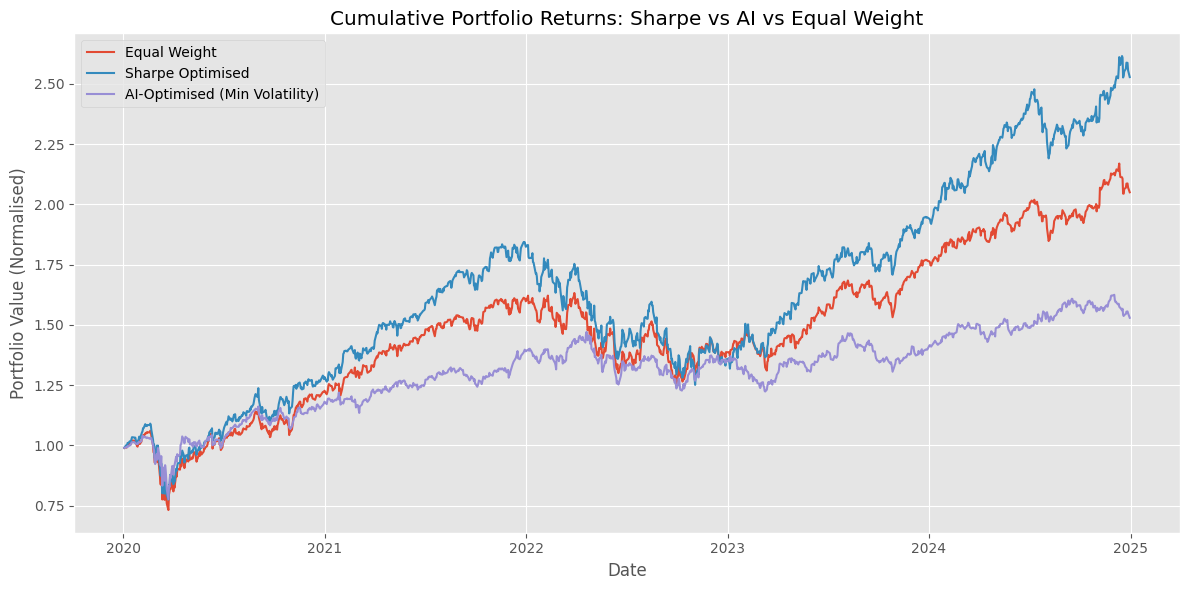

In [8]:
# Equal-weight portfolio returns already defined earlier
equal_cumulative_returns = cumulative_portfolio_returns  # from earlier section

# Plot all cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(equal_cumulative_returns, label='Equal Weight')
plt.plot(sharpe_cumulative_returns, label='Sharpe Optimised')
plt.plot(ai_cumulative_returns, label='AI-Optimised (Min Volatility)')
plt.title('Cumulative Portfolio Returns: Sharpe vs AI vs Equal Weight')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Normalised)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Optimised weight for each stock for each strategy

In [9]:
weights_df = pd.DataFrame({
    'Ticker': df.columns,
    'Equal Weight': np.round(equal_weights, 4),
    'Sharpe Optimised': np.round(sharpe_weights, 4),
    'AI (Min Volatility)': np.round(ai_weights, 4)
})

weights_df

,Ticker,Equal Weight,Sharpe Optimised,AI (Min Volatility)
0,ADBE,0.1,0.0000,0.0000
1,AMZN,0.1,0.0847,0.1222
2,CVX,0.1,0.0000,0.0653
3,GOOGL,0.1,0.2811,0.0122
4,JNJ,0.1,0.0000,0.4409
5,JPM,0.1,0.1632,0.0000
6,MSFT,0.1,0.2730,0.0000
7,PG,0.1,0.1859,0.3391
8,SCHW,0.1,0.0122,0.0197
9,V,0.1,0.0000,0.0006


# Overall Recommendation

The Sharpe Ratio Optimised portfolio achieved the highest total return compared to both the equal-weighted portfolio and the AI-optimised portfolio. This approach generates a cumulative return of approximately 160% over the five-year period. The AI-optimised approach achieved lower volatility but produced substantially lower returns. The weight_df table above displays the recommended weights for each strategy. The Sharpe-optimised strategy assigns the highest weight to large-cap growth stocks, including GOOGL (28.11%), MSFT (27.3%) and PG (18.59%), which drive significant risk-adjusted returns. This aligns with macro trends favouring resilient, innovative firms with global reach. However, ADBE, CVX, JNJ, and V receive a 0% weight, as they do not enhance the risk-adjusted return. For the AI-optimised strategy, stocks with historically stable price behaviour, such as JNJ (44.09%) and PG (33.91%), are heavily weighted. 

The Bollinger-Band mean-reversion strategy added limited value to this portfolio, except for Visa (V), where it outperformed Buy & Hold by approximately 10 percentage points. As a result, Visa (V) is the only stock that we recommend trading based on the mean reversion strategy. The strategy can be used in a tactical overlay alongside a broader long-term holding. For most other stocks, mean-reversion signals were ineffective. This is likely because most of the stocks experienced strong upward trends or sharp volatility spikes, which caused prices to move beyond the bands without immediate average reversion. Therefore, Buy & Hold is the more reliable strategy for this portfolio and period, and the Bollinger Band-based trading should be treated as supplemental.

The AI-generated code is intuitive and adaptable, as it introduces a minimum-volatility optimiser that adds real analytical value. We can directly compare return–risk trade-offs across the Sharpe ratio-optimised strategy and the minimised volatility strategy without additional refactoring. This side-by-side view highlighted how an investor might accept lower returns in exchange for a stable portfolio performance. At a technical level, every stage—data download, return calculation, and optimisation—was clearly documented, which accelerated both exploratory analysis and final presentation.

This investment portfolio spans several key economic sectors, including technology, healthcare, finance, energy, and consumer staples, providing comprehensive market protection through investments in stocks that exhibit better risk-return ratios. Hence, it is suitable for investors who want to grow their capital over the medium to long term while maintaining moderate levels of market volatility. Overall, the firm should invest in this portfolio through standardised Sharpe-based weighting and conduct quarterly optimisation reviews based on market conditions. It may also consider adding a minimal Bollinger-based risk measure to the Visa stock.
